In [1]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder




In [2]:
df = pd.read_csv("D:/ML/A5 projects/zomato/zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df['url'].is_unique


True

In [6]:
df = df.drop(['url','name'], axis=1)

In [7]:
df

,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [8]:
le = LabelEncoder()
df.iloc[:,1] = le.fit_transform(df.iloc[:,1])


In [9]:
le = LabelEncoder()
df.iloc[:,2] = le.fit_transform(df.iloc[:,2])
df

,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",1,1,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",1,0,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",1,0,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",0,0,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",0,0,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",0,0,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",0,0,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,0,0,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,0,1,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [10]:
df = df.drop(['phone'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   online_order                 51717 non-null  int32 
 2   book_table                   51717 non-null  int32 
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  menu_item                    51717 non-null  object
 12  listed_in(type)              51717 non-null  object
 13  listed_in(city)              51

In [12]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23406 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      23406 non-null  object
 1   online_order                 23406 non-null  int32 
 2   book_table                   23406 non-null  int32 
 3   rate                         23406 non-null  object
 4   votes                        23406 non-null  int64 
 5   location                     23406 non-null  object
 6   rest_type                    23406 non-null  object
 7   dish_liked                   23406 non-null  object
 8   cuisines                     23406 non-null  object
 9   approx_cost(for two people)  23406 non-null  object
 10  reviews_list                 23406 non-null  object
 11  menu_item                    23406 non-null  object
 12  listed_in(type)              23406 non-null  object
 13  listed_in(city)              23

In [13]:
df.columns
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [14]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23406 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23406 non-null  object 
 1   online_order  23406 non-null  int32  
 2   book_table    23406 non-null  int32  
 3   rate          23406 non-null  object 
 4   votes         23406 non-null  int64  
 5   location      23406 non-null  object 
 6   rest_type     23406 non-null  object 
 7   dish_liked    23406 non-null  object 
 8   cuisines      23406 non-null  object 
 9   cost          23406 non-null  float64
 10  reviews_list  23406 non-null  object 
 11  menu_item     23406 non-null  object 
 12  type          23406 non-null  object 
 13  city          23406 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(10)
memory usage: 2.5+ MB


In [15]:
df.rate.unique().tolist()

['4.1/5',
 '3.8/5',
 '3.7/5',
 '4.6/5',
 '4.0/5',
 '4.2/5',
 '3.9/5',
 '3.0/5',
 '3.6/5',
 '2.8/5',
 '4.4/5',
 '3.1/5',
 '4.3/5',
 '2.6/5',
 '3.3/5',
 '3.5/5',
 '3.8 /5',
 '3.2/5',
 '4.5/5',
 '2.5/5',
 '2.9/5',
 '3.4/5',
 '2.7/5',
 '4.7/5',
 'NEW',
 '2.4/5',
 '2.2/5',
 '2.3/5',
 '4.8/5',
 '3.9 /5',
 '4.2 /5',
 '4.0 /5',
 '4.1 /5',
 '2.9 /5',
 '2.7 /5',
 '2.5 /5',
 '2.6 /5',
 '4.5 /5',
 '4.3 /5',
 '3.7 /5',
 '4.4 /5',
 '4.9/5',
 '2.1/5',
 '2.0/5',
 '1.8/5',
 '3.4 /5',
 '3.6 /5',
 '3.3 /5',
 '4.6 /5',
 '4.9 /5',
 '3.2 /5',
 '3.0 /5',
 '2.8 /5',
 '3.5 /5',
 '3.1 /5',
 '4.8 /5',
 '2.3 /5',
 '4.7 /5',
 '2.4 /5',
 '2.1 /5',
 '2.2 /5',
 '2.0 /5',
 '1.8 /5']

In [16]:
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
df['rate'] = df['rate'].apply(lambda x: x.replace('NEW','0'))
df['rate'] = df['rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23406 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23406 non-null  object 
 1   online_order  23406 non-null  int32  
 2   book_table    23406 non-null  int32  
 3   rate          23406 non-null  float64
 4   votes         23406 non-null  int64  
 5   location      23406 non-null  object 
 6   rest_type     23406 non-null  object 
 7   dish_liked    23406 non-null  object 
 8   cuisines      23406 non-null  object 
 9   cost          23406 non-null  float64
 10  reviews_list  23406 non-null  object 
 11  menu_item     23406 non-null  object 
 12  type          23406 non-null  object 
 13  city          23406 non-null  object 
dtypes: float64(2), int32(2), int64(1), object(9)
memory usage: 2.5+ MB


In [17]:
df

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",1,1,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1.2,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",0,0,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",0,0,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1.2,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [18]:
df.location.unique().tolist()

['Banashankari',
 'Basavanagudi',
 'Jayanagar',
 'Kumaraswamy Layout',
 'Rajarajeshwari Nagar',
 'Mysore Road',
 'Uttarahalli',
 'South Bangalore',
 'Vijay Nagar',
 'Bannerghatta Road',
 'JP Nagar',
 'BTM',
 'Wilson Garden',
 'Koramangala 5th Block',
 'Shanti Nagar',
 'Richmond Road',
 'City Market',
 'Bellandur',
 'Sarjapur Road',
 'Marathahalli',
 'HSR',
 'Old Airport Road',
 'Indiranagar',
 'Koramangala 1st Block',
 'East Bangalore',
 'MG Road',
 'Brigade Road',
 'Lavelle Road',
 'Church Street',
 'Ulsoor',
 'Residency Road',
 'Shivajinagar',
 'Infantry Road',
 'St. Marks Road',
 'Cunningham Road',
 'Race Course Road',
 'Domlur',
 'Koramangala 8th Block',
 'Frazer Town',
 'Ejipura',
 'Vasanth Nagar',
 'Jeevan Bhima Nagar',
 'Old Madras Road',
 'Commercial Street',
 'Koramangala 6th Block',
 'Majestic',
 'Langford Town',
 'Koramangala 7th Block',
 'Brookefield',
 'Whitefield',
 'ITPL Main Road, Whitefield',
 'Varthur Main Road, Whitefield',
 'Koramangala 2nd Block',
 'Koramangala 3rd

In [19]:
df.rest_type.unique().tolist()

['Casual Dining',
 'Cafe, Casual Dining',
 'Quick Bites',
 'Casual Dining, Cafe',
 'Cafe',
 'Quick Bites, Cafe',
 'Delivery',
 'Dessert Parlor',
 'Pub',
 'Beverage Shop',
 'Bar',
 'Takeaway, Delivery',
 'Food Truck',
 'Quick Bites, Dessert Parlor',
 'Pub, Casual Dining',
 'Casual Dining, Bar',
 'Bakery',
 'Sweet Shop',
 'Dessert Parlor, Beverage Shop',
 'Beverage Shop, Quick Bites',
 'Microbrewery, Casual Dining',
 'Sweet Shop, Quick Bites',
 'Lounge',
 'Food Court',
 'Cafe, Bakery',
 'Microbrewery',
 'Kiosk',
 'Pub, Bar',
 'Casual Dining, Pub',
 'Cafe, Quick Bites',
 'Lounge, Bar',
 'Bakery, Quick Bites',
 'Dessert Parlor, Quick Bites',
 'Bar, Casual Dining',
 'Beverage Shop, Dessert Parlor',
 'Casual Dining, Microbrewery',
 'Mess',
 'Lounge, Casual Dining',
 'Cafe, Dessert Parlor',
 'Dessert Parlor, Cafe',
 'Bakery, Dessert Parlor',
 'Quick Bites, Sweet Shop',
 'Takeaway',
 'Microbrewery, Pub',
 'Club',
 'Fine Dining',
 'Bakery, Cafe',
 'Beverage Shop, Cafe',
 'Pub, Cafe',
 'Casual D

In [20]:
df.dish_liked.unique().tolist()

['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
 'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri, Gol Gappe',
 'Onion Rings, Pasta, Kadhai Paneer, Salads, Salad, Roti, Jeera Rice',
 'Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza',
 'Pizza, Mocktails, Coffee, Nachos, Salad, Pasta, Sandwiches',
 'Waffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese Nachos',
 'Waffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, Crepe',
 'Mocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, Nachos',
 'Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sandwich, Garlic Bread',
 'Sandwich, Omelette, Ice Tea, Virgin Mojito, Hot Chocolate, Pasta Arrabiata, Hazelnut Cappuccino',
 'Garl

In [21]:
df = df.drop(['dish_liked'], axis=1)

In [22]:
def Encode(zomato):
    for column in df.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df = Encode(df.copy())

In [23]:
df.describe()[1:].T.style.background_gradient(cmap='YlOrRd')

,mean,std,min,25%,50%,75%,max
address,1837.920619,1097.244851,0.000000,1032.000000,1772.000000,2532.750000,4400.000000
online_order,0.297274,0.457068,0.000000,0.000000,0.000000,1.000000,1.000000
book_table,0.737589,0.439954,0.000000,0.000000,1.000000,1.000000,1.000000
rate,3.881304,0.524986,0.000000,3.800000,4.000000,4.200000,4.900000
votes,601.586602,1111.011205,0.000000,102.000000,223.000000,592.000000,16832.000000
location,29.056695,19.981899,0.000000,13.000000,23.000000,44.000000,87.000000
rest_type,7.861873,12.521357,0.000000,0.000000,2.000000,8.000000,72.000000
cuisines,462.016150,433.550754,0.000000,92.000000,297.000000,730.000000,1690.000000
cost,379.024742,280.563968,1.000000,3.000000,400.000000,600.000000,950.000000
reviews_list,6218.082457,4214.337335,0.000000,2448.250000,5795.500000,10115.750000,14155.000000


In [24]:
features = df.corr()['rate'].sort_values()

features

book_table     -0.254730
cost           -0.146239
address        -0.021447
online_order    0.000443
location        0.006382
menu_item       0.013599
type            0.017509
city            0.033025
reviews_list    0.086994
cuisines        0.095447
rest_type       0.147448
votes           0.333904
rate            1.000000
Name: rate, dtype: float64

<AxesSubplot:>

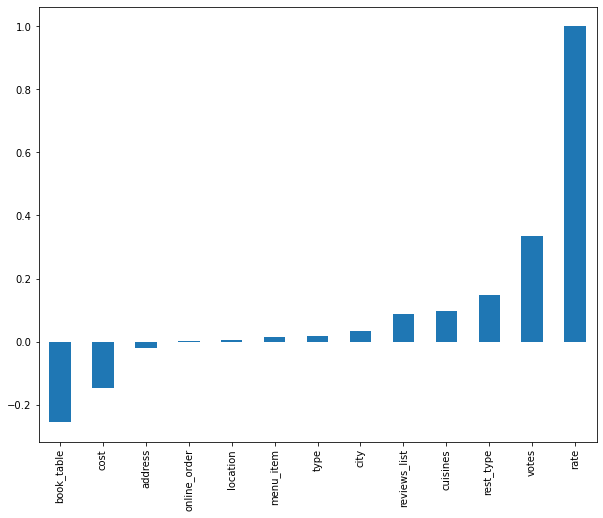

In [25]:
features.plot(kind='bar',figsize=(10,8))

<AxesSubplot:>

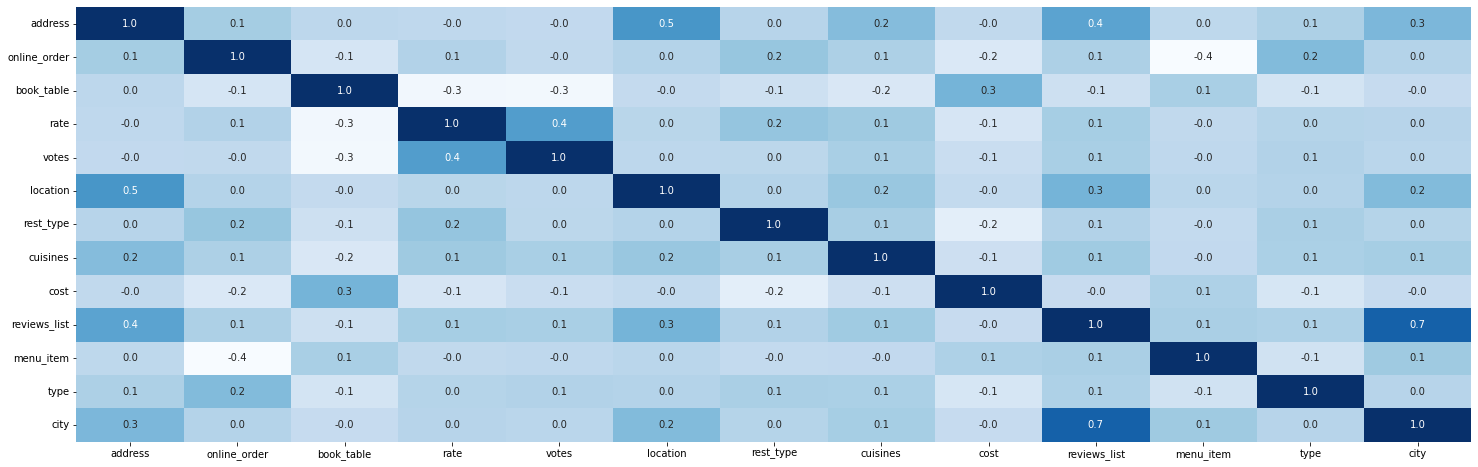

In [26]:
plt.figure(figsize=(25,8))
sns.heatmap(df.corr(method='kendall'),annot=True, cbar=False, cmap='Blues', fmt='.1f')

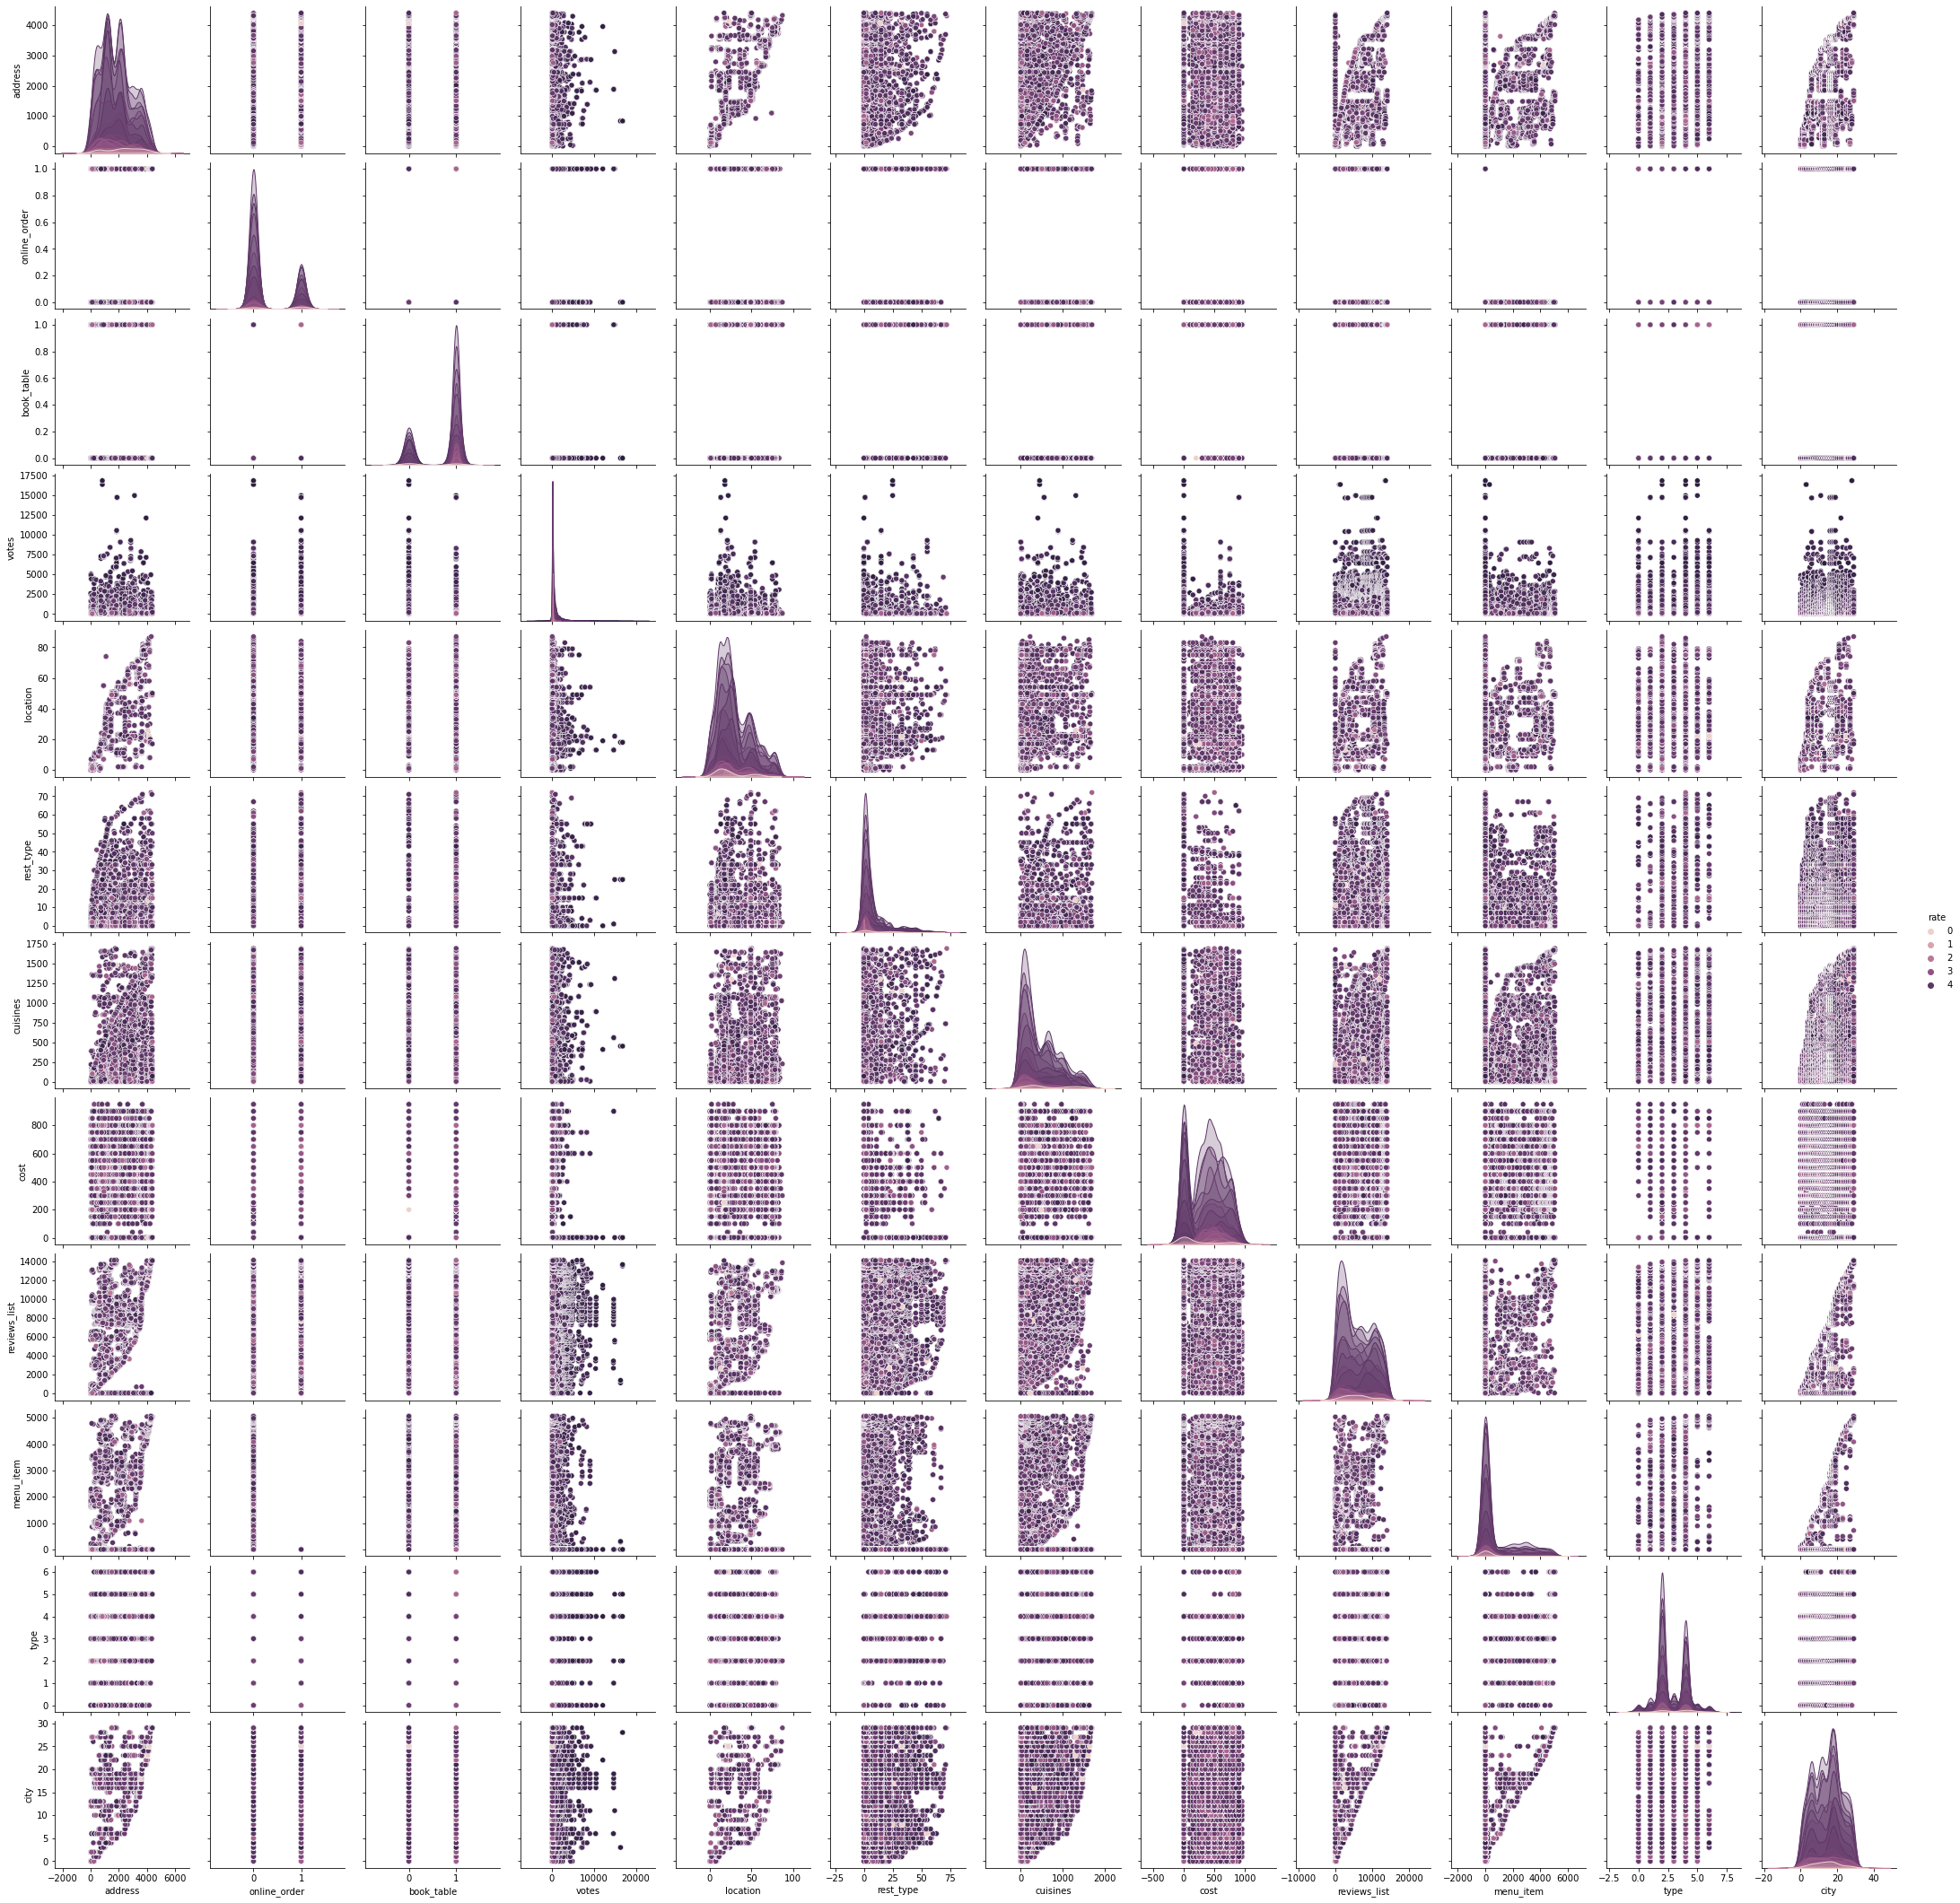

In [27]:
# Pair Plot correlation between all attributes
sns.pairplot(df,hue='rate')

In [28]:
Numerical=df.select_dtypes(exclude='object').columns.tolist()
Numerical

['address',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'cost',
 'reviews_list',
 'menu_item',
 'type',
 'city']

## Distrubtion of the data 

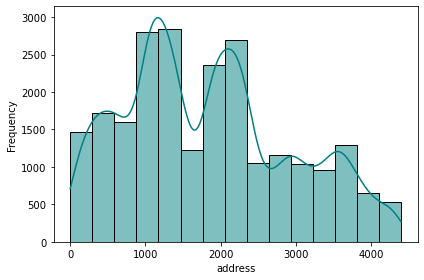

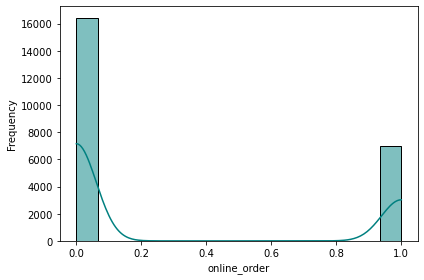

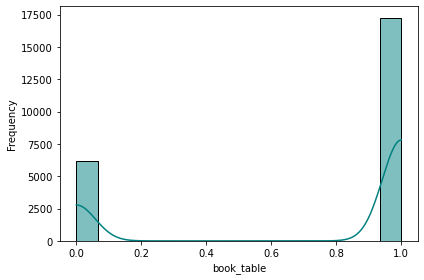

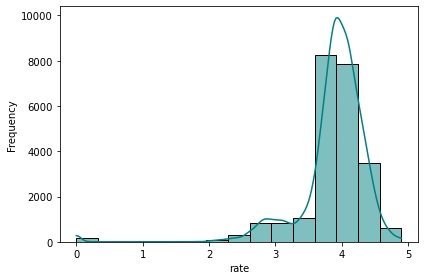

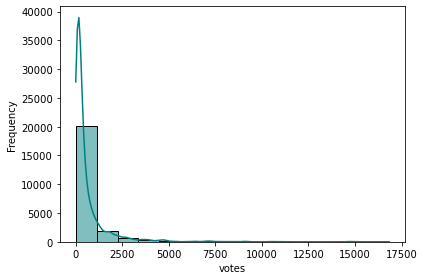

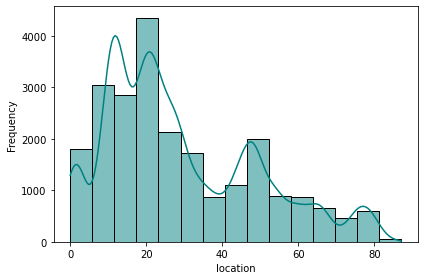

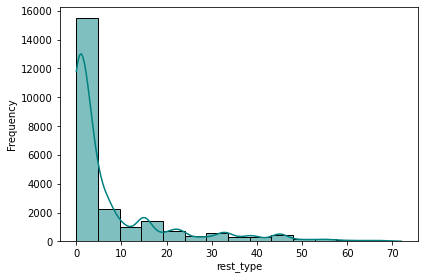

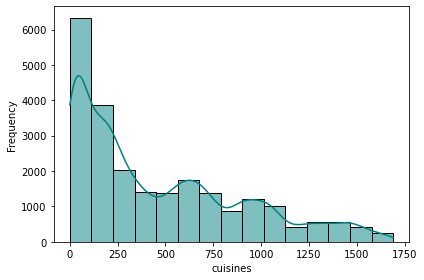

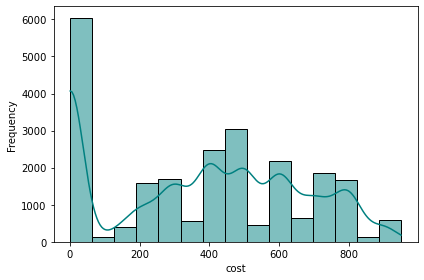

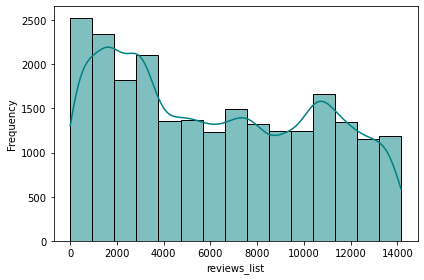

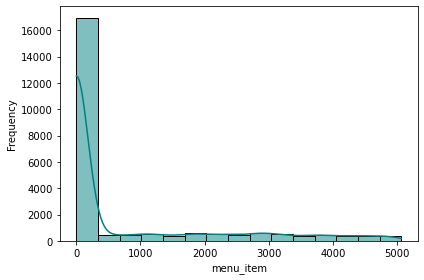

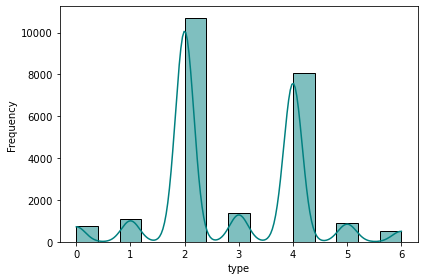

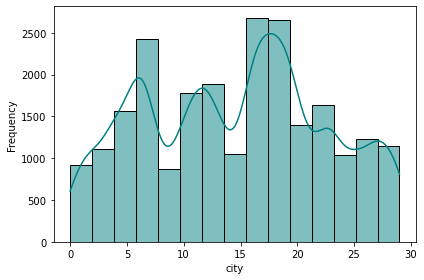

In [29]:
for i in Numerical:
    ax=sns.histplot(x= df[i], color='teal', bins= 15, kde= True, palette= 'twilight')
    ax.set(xlabel= i , ylabel= 'Frequency')
    
    plt.tight_layout()
    plt.show()

## Checking for outlires


<Figure size 432x288 with 0 Axes>

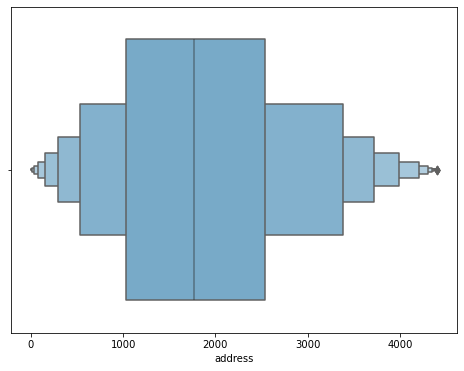

<Figure size 432x288 with 0 Axes>

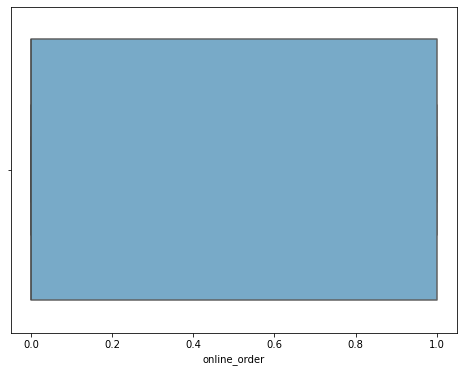

<Figure size 432x288 with 0 Axes>

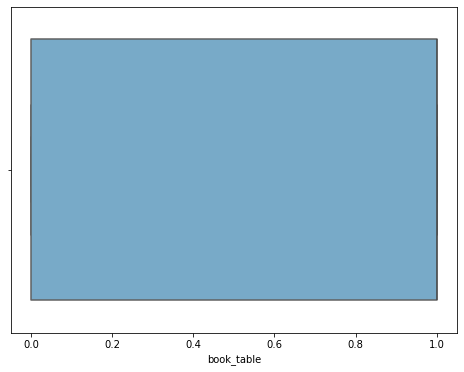

<Figure size 432x288 with 0 Axes>

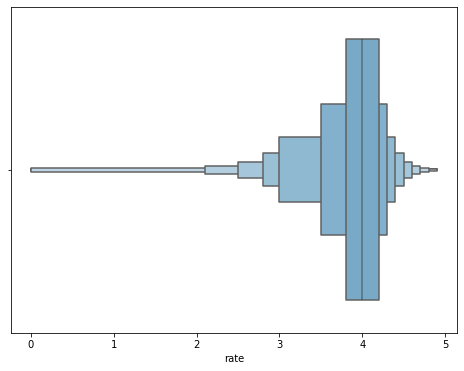

<Figure size 432x288 with 0 Axes>

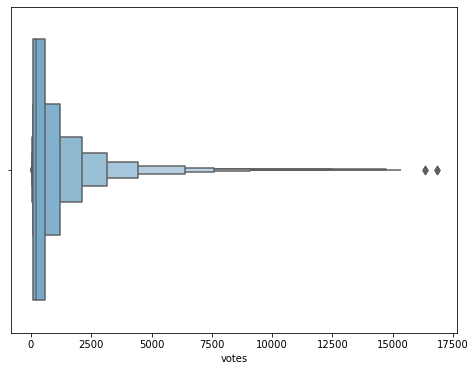

<Figure size 432x288 with 0 Axes>

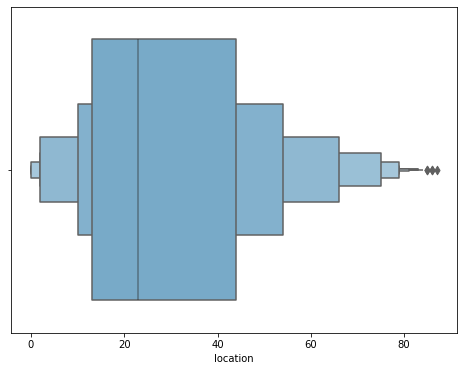

<Figure size 432x288 with 0 Axes>

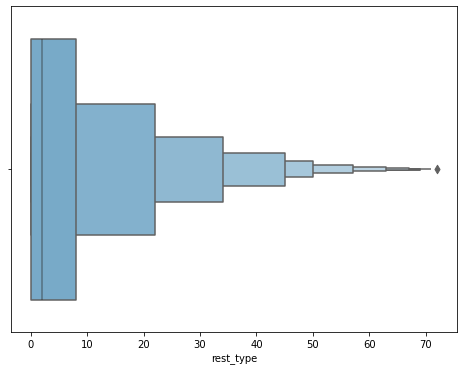

<Figure size 432x288 with 0 Axes>

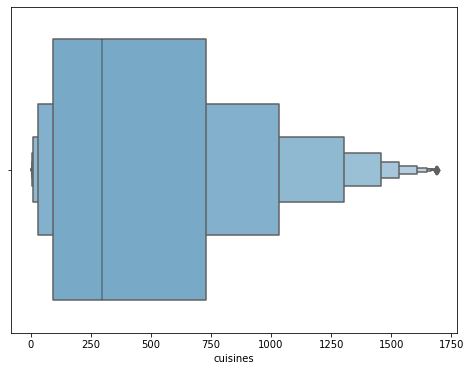

<Figure size 432x288 with 0 Axes>

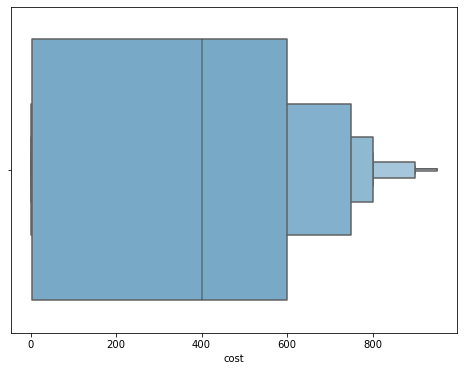

<Figure size 432x288 with 0 Axes>

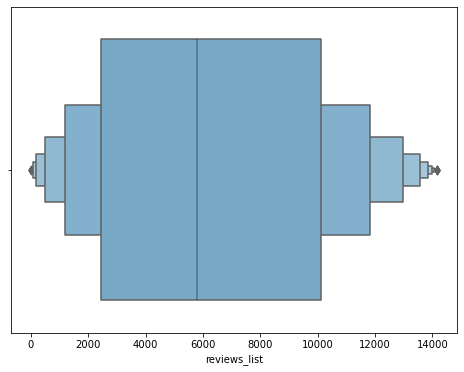

<Figure size 432x288 with 0 Axes>

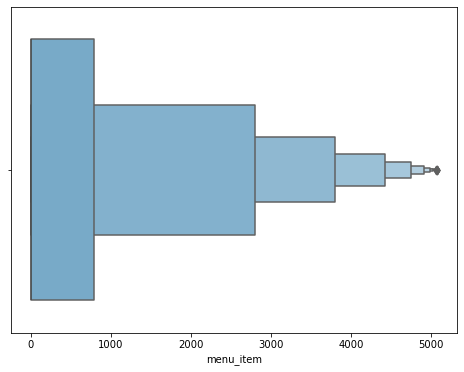

<Figure size 432x288 with 0 Axes>

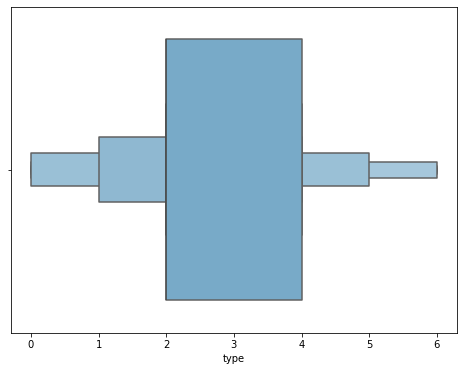

<Figure size 432x288 with 0 Axes>

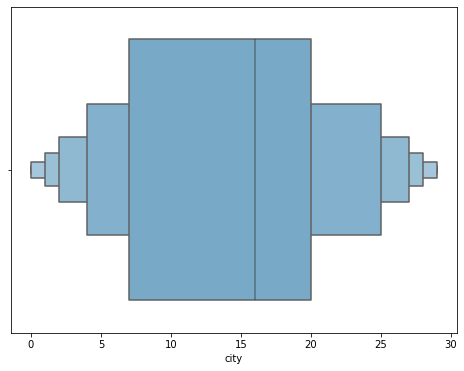

In [30]:
for i in Numerical:
    plt.figure()
    plt.tight_layout()
    
    plt.figure(figsize=(8,6))
    sns.boxenplot(x=df[i],palette='Blues')
    plt.show()

## deal with outlires

In [31]:
number_of_outliers=[None]*len(Numerical)
q75=[None]*len(Numerical)
q25=[None]*len(Numerical)
IQR=[None]*len(Numerical)
unique_values=[None]*len(Numerical)
ratio=[None]*len(Numerical)

for i, p in enumerate(Numerical):
    q75[i], q25[i]= np.percentile(df[p],[95,5])
    IQR[i]= q75[i]- q25[i]
    #number_of_outliers[i]=df[~((df[p] < (q75[i] + 1.5 * IQR[i])) & (df[p] > (q25[i]-1.5*IQR[i])))].shape[0]
    number_of_outliers[i]=len((np.where((df[p] > (q75[i] + 1.5 * IQR[i])) | (df[p]< (q25[i] - 1.5 * IQR[i])))[0]))
    unique_values[i]= len(df[p].unique())
    ratio[i]= number_of_outliers[i]/unique_values[i]
    print('outliers of',p," =", number_of_outliers[i])
    print('unique_values',p," =", unique_values[i])
    print('ratio',p," =", ratio[i])
    print("*"*40)

outliers of address  = 0
unique_values address  = 4401
ratio address  = 0.0
****************************************
outliers of online_order  = 0
unique_values online_order  = 2
ratio online_order  = 0.0
****************************************
outliers of book_table  = 0
unique_values book_table  = 2
ratio book_table  = 0.0
****************************************
outliers of rate  = 147
unique_values rate  = 32
ratio rate  = 4.59375
****************************************
outliers of votes  = 193
unique_values votes  = 2303
ratio votes  = 0.08380373425966131
****************************************
outliers of location  = 0
unique_values location  = 88
ratio location  = 0.0
****************************************
outliers of rest_type  = 0
unique_values rest_type  = 73
ratio rest_type  = 0.0
****************************************
outliers of cuisines  = 0
unique_values cuisines  = 1691
ratio cuisines  = 0.0
****************************************
outliers of cost  = 0
unique_va

In [32]:
#Find the outliers records which fall with +/- 5% boundaries 

Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

print("Number of outliers for entire dataset = ", len(df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]))

Number of outliers for entire dataset =  340


## Split the data

In [33]:
X= df.drop(["rate"], axis=1)
y= df.rate

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

## Modeling

In [35]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_absolute_error,r2_score


In [36]:
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor()
]

In [37]:
%%time
for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.009s
	Prediction time: 0.003s
	Mean absolute error: 0.29973914854340555
	R2 score: 0.14588048847621415

Lasso()
	Training time: 0.008s
	Prediction time: 0.001s
	Mean absolute error: 0.30578664192143024
	R2 score: 0.12334343461948527

Ridge()
	Training time: 0.007s
	Prediction time: 0.001s
	Mean absolute error: 0.2997381977430749
	R2 score: 0.14588084359490983

KNeighborsRegressor()
	Training time: 0.125s
	Prediction time: 0.102s
	Mean absolute error: 0.2560615121742845
	R2 score: 0.3305336057192868

DecisionTreeRegressor()
	Training time: 0.134s
	Prediction time: 0.002s
	Mean absolute error: 0.04831268688594636
	R2 score: 0.8751668945685402

RandomForestRegressor()
	Training time: 8.145s
	Prediction time: 0.101s
	Mean absolute error: 0.06691734301580556
	R2 score: 0.9237511889230444

GradientBoostingRegressor()
	Training time: 2.523s
	Prediction time: 0.008s
	Mean absolute error: 0.23148398559947897
	R2 score: 0.6198498713276247

ExtraTreesRegressor

In [43]:
from sklearn.model_selection import cross_val_score


In [51]:
model[7]

ExtraTreeRegressor(random_state=1031608773)

In [55]:
y_pred_XT = models[7].predict(X_test)

C:\Users\MATRIX WIN10 PRO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MATRIX WIN10 PRO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


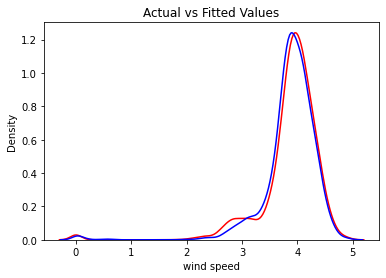

In [56]:
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_XT, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('wind speed')

plt.show()
plt.close()